<a href="https://www.kaggle.com/code/ramakrushnamohapatra/zomato-data-linear-regression?scriptVersionId=118603215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Zomato Data: Linear Regression**

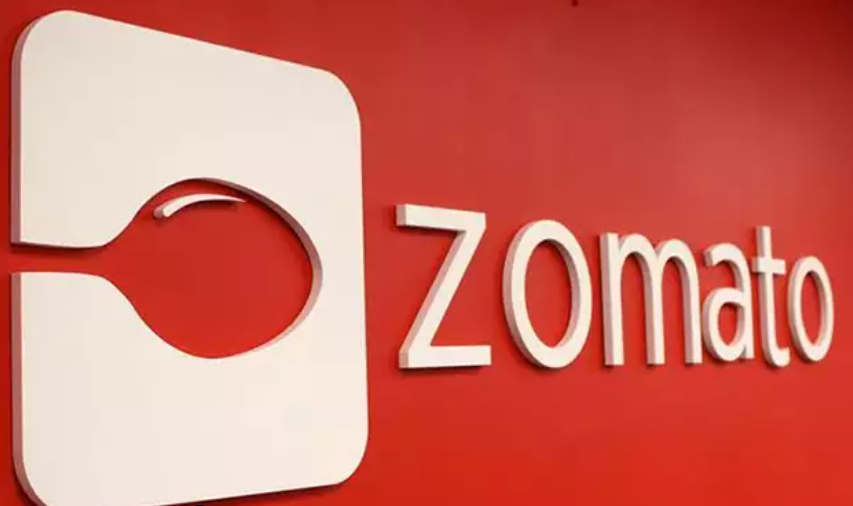

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.shape

(51717, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# **Data Cleaning**

In [5]:
round(100*(data.isna().sum()/len(data)),2)

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


* **Dish_liked is having more 40% null values. So, we can drop that column.**

In [7]:
data.drop('dish_liked', axis = 1, inplace = True)

In [8]:
data.shape

(51717, 16)

**rate column is object type and we are splitting that and taking only the first value. E.g 4.5/5, we are taking 4.5** 

In [9]:
data['rate'] = data['rate'].astype('str')

In [10]:
def ratex(element):
    
    element = element.split('/')
    return element[0]

In [11]:
data['rate'] = data['rate'].apply(ratex)

In [12]:
data.rate.value_counts()

nan     7775
NEW     2208
3.9     2098
3.8     2022
3.7     2011
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, Length: 65, dtype: int64

**NEW and NAN values are not required**

In [13]:
data= data.drop(data[data['rate'] == 'NEW'].index)

**Now Impute the value of NAN with Median values**

In [14]:
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

In [15]:
data['rate'].fillna(data['rate'].median(), inplace=True)

In [16]:
round(100*(data.isna().sum()/len(data)),2)

url                            0.00
address                        0.00
name                           0.00
online_order                   0.00
book_table                     0.00
rate                           0.00
votes                          0.00
phone                          2.41
location                       0.04
rest_type                      0.45
cuisines                       0.09
approx_cost(for two people)    0.70
reviews_list                   0.00
menu_item                      0.00
listed_in(type)                0.00
listed_in(city)                0.00
dtype: float64

In [17]:
data.dropna(subset=['phone', 'location', 'rest_type', 'cuisines','approx_cost(for two people)'], inplace=True)

In [18]:
round(100*(data.isna().sum()/len(data)),2)

url                            0.0
address                        0.0
name                           0.0
online_order                   0.0
book_table                     0.0
rate                           0.0
votes                          0.0
phone                          0.0
location                       0.0
rest_type                      0.0
cuisines                       0.0
approx_cost(for two people)    0.0
reviews_list                   0.0
menu_item                      0.0
listed_in(type)                0.0
listed_in(city)                0.0
dtype: float64

**Data cleaning is now done. Every column is fill with values and has no null values.**

## Target Variable Selection

We are taking two column that is 'online_order' and 'book_table', combine them to a single column as 'order' and making that as a target variable

In [19]:
def order_yes_no(order1, order2):
    if order1 == 'Yes' and order2 == 'Yes':
        return '1'
    elif order1 == 'Yes' and order2 == 'No':
        return '1'
    elif order1 == 'No' and order2 == 'Yes':
        return '1'
    else:
        return '0'

In [20]:
data['order'] = data.apply(lambda x: order_yes_no(x['online_order'], x['book_table']), axis=1)

In [21]:
data.order.astype("int")

0        1
1        1
2        1
3        0
4        0
        ..
51711    0
51712    0
51713    0
51715    1
51716    0
Name: order, Length: 48087, dtype: int64

In [22]:
data.order.value_counts()

1    31486
0    16601
Name: order, dtype: int64

# **EDA**

**import modules for EDA**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline